In [103]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from opensimplex import OpenSimplex

%matplotlib inline

In [114]:
seed = np.random.randint(0,100)
gen = OpenSimplex(seed=seed)

def noise(nx, ny):
    # rescale from -1:1 to 0:1
    return gen.noise2d(nx, ny) / 2.0 + 0.5

def generate_terrain(width=512, height=512, frequency=1, distribution=2):
    image = (height, width)
    image = np.zeros(image)
    a = 0.06
    b = 0.85
    c = 1.2
    for y in range(height):
        for x in range(width):
            nx = x/width - 0.5
            ny = y/height - 0.5
            # Playing with different elevation formula to control island creation
            # Using eclidean distance d
            d = 2 * math.sqrt(nx * nx + ny * ny)
            e = noise(frequency * nx, frequency * ny)
            e = (e + a) * (1 - b * np.power(d, c))
            image[y][x] = np.power(e, distribution)

    return image

def create_biome(terrain):
    color_terrain = np.zeros((len(terrain[0]), len(terrain[1]))+(3,))
    
    ocean = [65,105,225]
    beach = [238,214,175]
    jungle = [34,139,34]
    mountain = [139,137,137]
    snow = [255,250,250]
    
    #print(len(terrain[0]))
    
    for x in range(len(terrain[0])):
        for y in range(len(terrain[1])):
            if terrain[x][y] < 0.3:
                color_terrain[x][y] = ocean
            elif terrain[x][y] < 0.4:
                color_terrain[x][y] = beach
            elif terrain[x][y] < 0.6:
                color_terrain[x][y] = jungle
            elif terrain[x][y] < 0.7:
                color_terrain[x][y] = mountain
            elif terrain[x][y] < 1.0:
                color_terrain[x][y] = snow

    return color_terrain

def normalize_matrix(matrix):
    min = np.min(matrix)
    max = np.max(matrix)

    return np.uint8((matrix - min) * 255/(max - min))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in power


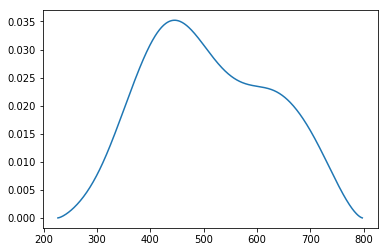

In [115]:
terrain = generate_terrain(width=1024, height=1024, frequency=5, distribution=1.5)
#print(terrain)
plt.figure()
plt.plot(terrain[0])

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


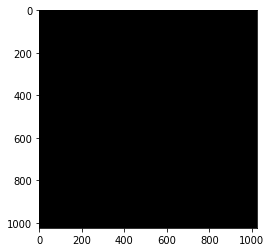

In [116]:
image = Image.fromarray(normalize_matrix(terrain), 'P')
plt.imshow(image, label='terrain')

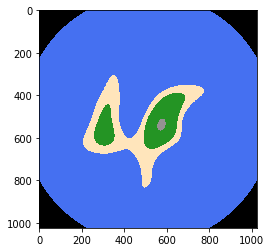

In [117]:
biome = create_biome(terrain)
biome_image = Image.fromarray(normalize_matrix(biome), 'RGB')
plt.imshow(biome_image)